### Importación de Bibliotecas

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode, kurtosis, skew, ttest_ind, ks_2samp, norm
from scipy.stats import t

### Carga de Datos

In [8]:
df = pd.read_excel('data.xlsx')

### Cálculo de Medidas de Centralización, Dispersión, Asimetría y Curtosis

In [21]:
# Dividir los datos en sub-muestras
predinastico_temprano = df[df['Época histórica'] == 1]['Anchura del cráneo']
predinastico_tardio = df[df['Época histórica'] == 2]['Anchura del cráneo']

# Función para obtener estadísticas
def calcular_estadisticas(datos):
    estadisticas = {
        'Media': np.mean(datos),
        'Mediana': np.median(datos),
        'Moda': mode(datos),
        'Desviación Estándar': np.std(datos, ddof=1),
        'Varianza': np.var(datos, ddof=1),
        'Coeficiente de Variación de Pearson': (np.std(datos, ddof=1) / np.mean(datos)) * 100,
        'Asimetría': skew(datos),
        'Curtosis': kurtosis(datos)
    }
    return estadisticas

# Calcular estadísticas para cada periodo
estadisticas_temprano = calcular_estadisticas(predinastico_temprano)
estadisticas_tardio = calcular_estadisticas(predinastico_tardio)

# Imprimir resultados
print("Estadísticas para el periodo predinástico temprano:")
print(estadisticas_temprano)
print("\nEstadísticas para el periodo predinástico tardío:")
print(estadisticas_tardio)

Estadísticas para el periodo predinástico temprano:
{'Media': 131.53333333333333, 'Mediana': 131.5, 'Moda': ModeResult(mode=131, count=13), 'Desviación Estándar': 0.8193072487266863, 'Varianza': 0.6712643678160921, 'Coeficiente de Variación de Pearson': 0.6228894440395486, 'Asimetría': 0.6569830307466812, 'Curtosis': 1.304372302495782}

Estadísticas para el periodo predinástico tardío:
{'Media': 132.46666666666667, 'Mediana': 133.0, 'Moda': ModeResult(mode=133, count=13), 'Desviación Estándar': 1.0080138659874618, 'Varianza': 1.0160919540229887, 'Coeficiente de Variación de Pearson': 0.7609566175043747, 'Asimetría': 0.19510554794191115, 'Curtosis': -0.18623697303495312}


### Diagrama de Caja y Bigotes

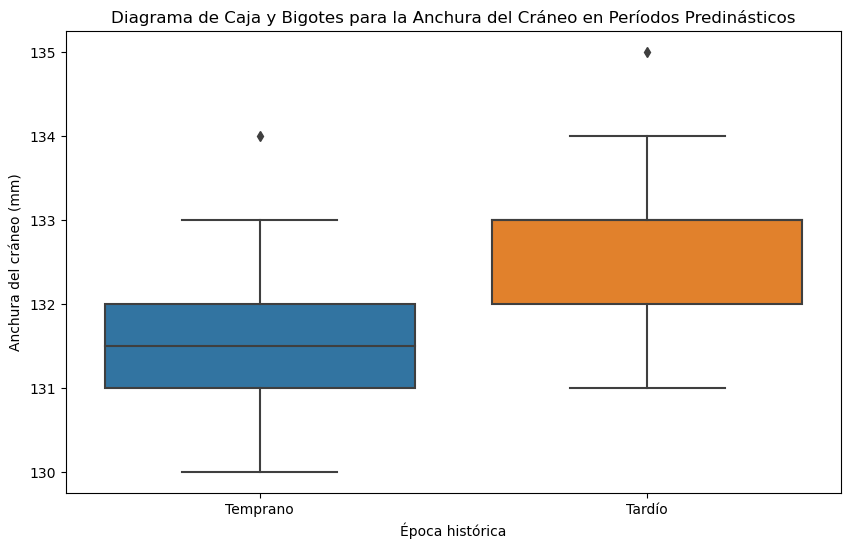

In [10]:
# Crear diagrama de caja y bigotes
plt.figure(figsize=(10, 6))
sns.boxplot(x='Época histórica', y='Anchura del cráneo', data=df)
plt.xlabel('Época histórica')
plt.ylabel('Anchura del cráneo (mm)')
plt.title('Diagrama de Caja y Bigotes para la Anchura del Cráneo en Períodos Predinásticos')
plt.xticks([0, 1], ['Temprano', 'Tardío'])
plt.show()

In [16]:
cuartiles_temprano = predinastico_temprano.quantile([0.25, 0.5, 0.75])
print("Cuartiles y mediana para el periodo Temprano:\n", cuartiles_temprano)
cuartiles_tardio = predinastico_tardio.quantile([0.25, 0.5, 0.75])
print("Cuartiles y mediana para el periodo Tardío:\n", cuartiles_tardio)

Cuartiles y mediana para el periodo Temprano:
 0.25    131.0
0.50    131.5
0.75    132.0
Name: Anchura del cráneo, dtype: float64
Cuartiles y mediana para el periodo Tardío:
 0.25    132.0
0.50    133.0
0.75    133.0
Name: Anchura del cráneo, dtype: float64


### Test de Normalidad (Kolmogorov-Smoirnov)

In [12]:
# Test de Kolmogorov-Smirnov para la normalidad
ks_temprano = ks_2samp(predinastico_temprano, norm.rvs(size=len(predinastico_temprano)))
ks_tardio = ks_2samp(predinastico_tardio, norm.rvs(size=len(predinastico_tardio)))

print("Test de Kolmogorov-Smirnov para normalidad:")
print(f"Predinástico temprano: Estadístico={ks_temprano.statistic}, p-valor={ks_temprano.pvalue}")
print(f"Predinástico tardío: Estadístico={ks_tardio.statistic}, p-valor={ks_tardio.pvalue}")

Test de Kolmogorov-Smirnov para normalidad:
Predinástico temprano: Estadístico=1.0, p-valor=1.6911233892144742e-17
Predinástico tardío: Estadístico=1.0, p-valor=1.6911233892144742e-17


### Intervalos de Confianza para la Diferencia de Medias

In [13]:
# Función para calcular intervalo de confianza para diferencia de medias
def intervalo_confianza(muestra1, muestra2, confianza):
    media1, media2 = np.mean(muestra1), np.mean(muestra2)
    varianza1, varianza2 = np.var(muestra1, ddof=1), np.var(muestra2, ddof=1)
    n1, n2 = len(muestra1), len(muestra2)

    # Error estándar de la diferencia de medias
    error_std = np.sqrt(varianza1 / n1 + varianza2 / n2)
    diferencia_media = media1 - media2

    # Intervalo de confianza
    z = t.ppf((1 + confianza) / 2, df=min(n1, n2) - 1)
    limite_inferior = diferencia_media - z * error_std
    limite_superior = diferencia_media + z * error_std

    return limite_inferior, limite_superior

# Calcular intervalos de confianza
niveles_confianza = [0.90, 0.95, 0.99]
for nivel in niveles_confianza:
    intervalo = intervalo_confianza(predinastico_temprano, predinastico_tardio, nivel)
    print(f"Intervalo de confianza al {int(nivel * 100)}%: {intervalo}")

Intervalo de confianza al 90%: (-1.3362995352745775, -0.5303671313920968)
Intervalo de confianza al 95%: (-1.4183814834232562, -0.4482851832434181)
Intervalo de confianza al 99%: (-1.5870398198651203, -0.2796268468015539)


### Test t para la Igualdad de Medias

In [14]:
# Test t para la igualdad de medias
t_stat, p_valor = ttest_ind(predinastico_temprano, predinastico_tardio, equal_var=False)

print("Test t para la diferencia de medias:")
print(f"Estadístico t: {t_stat}")
print(f"p-valor: {p_valor}")

# Interpretación del resultado
if p_valor < 0.05:
    print("Existe una diferencia significativa en las medias de anchura craneal entre los períodos.")
else:
    print("No se encontró una diferencia significativa en las medias de anchura craneal entre los períodos.")

Test t para la diferencia de medias:
Estadístico t: -3.93544640665054
p-valor: 0.00023289762981742906
Existe una diferencia significativa en las medias de anchura craneal entre los períodos.
